# Mega Case Study

## Part 1 - SOM

### Importing the libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Importing the dataset

In [15]:
df = pd.read_csv('Credit_Card_Applications.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
X = sc.fit_transform(X)

### Training the SOM

In [18]:
from minisom import MiniSom
som = MiniSom(x= 10, y= 10, input_len= 15, sigma=0.1, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data= X, num_iteration=100)

### Visualizing the results

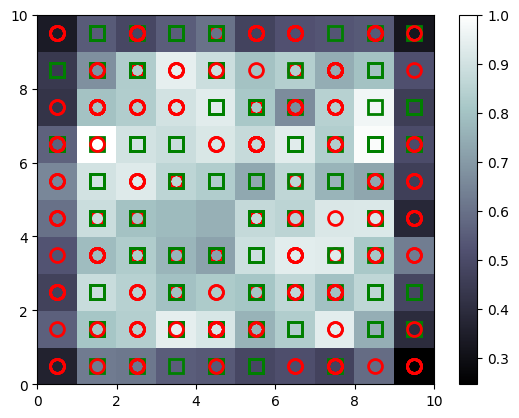

In [29]:
from pylab import bone, pcolor, colorbar, plot ,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers= ['o', 's']
colors= ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor= colors[y[i]],
         markerfacecolor = 'None',
         markersize=10,
         markeredgewidth=2)
show()

### Finding the frauds

In [33]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,1)], mappings[(8,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [40]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15789201
15801817
15773421
15682686
15707602
15598614
15712483
15572361


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [44]:
customers = df.iloc[:, 1:].values

### Creating the Dependent Variable

In [46]:
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [50]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [30]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9261 - loss: 0.3949
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.2452
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.1494
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.1100
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0991
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.0929
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9768 - loss: 0.0887
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0849
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.0813
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0789


### Predicting the test set results

In [31]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [58]:
for row in y_pred:
    print(f"{int(row[0])}\t{row[1]:.8f}")

15621423	0.00000000
15799785	0.00000001
15687688	0.00000030
15621244	0.00000108
15636521	0.00000111
15720725	0.00000221
15645820	0.00000222
15815095	0.00000243
15591035	0.00000252
15748649	0.00000272
15567834	0.00000352
15738487	0.00000411
15569595	0.00000458
15573520	0.00000486
15781875	0.00000575
15652048	0.00000676
15686461	0.00000706
15568819	0.00000803
15604963	0.00000822
15728010	0.00000850
15708714	0.00000872
15765257	0.00000896
15631267	0.00000990
15629133	0.00001053
15761554	0.00001058
15778345	0.00001086
15759387	0.00001103
15627190	0.00001228
15762045	0.00001245
15768600	0.00001339
15595010	0.00001424
15721569	0.00001567
15773776	0.00001684
15720644	0.00001715
15693382	0.00001745
15624595	0.00001775
15618410	0.00001847
15642098	0.00001964
15789611	0.00002023
15642391	0.00002056
15657778	0.00002171
15771409	0.00002187
15605276	0.00002297
15678882	0.00002544
15583552	0.00002629
15802106	0.00002670
15717065	0.00002675
15690372	0.00002736
15689268	0.00002815
15682576	0.00002986
